<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch10_Correction_fin_NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch4 - Notebook : Variables Aléatoires à Densité**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Correction de la partie autonome du TP**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **TP à réaliser maintenant**
Soit $a$ un réel positif.
On considère une variable aléatoire X, dont la densité f est donnée par : 

$$f(t) = \left\{\begin{matrix} 0 \: , si \: t<0 \\ \frac{3t^2}{a^3}, si \: 0\leqslant t \leqslant a \\ 0\: , \: si \: t > a \end{matrix}\right.$$

1. Calculer la fonction de répartition $F_X$ de $X$.
2. Calculer, si possible, espérance et variance de X.
3. Tracer sur un même graphique $f$ et $F_X$.
4. Démontrer que $F_X$ est bijective de $[0,a]$ vers $[0,1]$ et calculer $F_X^{-1}$.
5. Réaliser une simulation Python de $N$ tirages aléatoires selon la variable X, en utilisant le procédé d'inversion de la fonction de répartition.
6. Réaliser l'histogramme de la simulation, l'intervalle $[0,a]$ partagé en $d$ subdivisions. 
7. Qu'observe-t-on ? Que se passe-t-il si on augmente la taille N de l'échantillon ?
8. Calculer la moyenne de l'échantillon et comparer avec l'espérance théorique.
9. Calculer la variance (stastistique) de l'échantillon et comparer avec la variance théorique. 






* **CORRECTION :**

Pour les éléments de code, il suffit de reprendre et d'adapter les éléments des paragraphes précédents...

## 1. Fonction de répartition.

Par définition : 

$$\forall x \in \mathbb{R}, F_X(x) = \int_{-\infty}^{+\infty}f(t)dt$$

donc 
* si $x \leqslant 0$, 
$$F_X(x) = \int_{-\infty}^{x}f(t)dt = \int_{-\infty}^{x}0dt = 0$$

* si $0 \leqslant  x \leqslant a$,
$$F_X(x) = \int_{-\infty}^{x}f(t)dt = \int_{-\infty}^{0}0dt + \int_{0}^{x}\frac{3t^2}{a^3}dt= 0 + \left [  \frac{t^3}{a^3}\right ]_0^x = \frac{x^3}{a^3}$$

* si $x>1$

$$F_X(x) = \int_{-\infty}^{x}f(t)dt = \int_{-\infty}^{0}0dt + \int_{0}^{a}\frac{3t^2}{a^3}dt + \int_{a}^{x}0dt= 0 + \frac{a^3}{a^3}dt + 0 = 1$$

## 2. Espérance et variance de X.

* Si 
$$\int_{-\infty}^{+\infty}t.f(t)dt$$ converge absolument, sa valeur sera $E(X)$.
Or 
$$\int_{-\infty}^{+\infty}t.f(t)dt = \int_{0}^{a}t.f(t)dt$$ intégrale d'une fonction continue sur un intervalle borné, donc existe.
Donc 
$$E(X) = \int_{0}^{a}\frac{3t^3}{a^3}dt = \left [  \frac{3t^4}{4a^3}\right ]_0^a =\frac{3a}{4}$$

* De même, 
$$E(X^2) = \int_{0}^{a}\frac{3t^4}{a^3}dt = \left [  \frac{3t^5}{5a^3}\right ]_0^a =\frac{3a^2}{5}$$
et par la formule de Koenig-Huygens, 

$$V(X) = E(X^2) - \left [  E(X)\right ]^2 = \frac{3a^2}{5} - \left (\frac{3a}{4}\right )^2 =\frac{3a^2}{5} - \frac{9a^2}{16} = \frac{3a^2}{80}$$

## 3. Représentations graphiques de la densité et de la fonction de répartition.

In [ ]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt

In [ ]:
def centrax() :
    '''Fonction cosmétique d'ajustement des axes graphiques'''
    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

    plt.legend()

In [ ]:
# densité
def densite(xx, a):
    y = [3*x**2/a**3 * (0 <= x <= a) for x in xx] # valeurs de la densité
    return y

# Fonction de répartition
def fonction_repartition(xx, a):
    r = [x**3/a**3 * (0 <= x <= a) + 1 * (x > a) for x in xx] # valeurs de la fonction de répartition
    return r




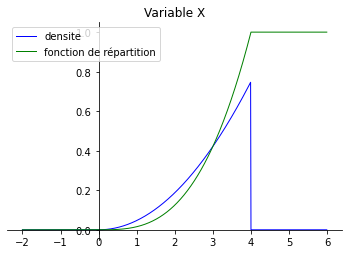

In [ ]:
def densite_fonction2repartition(a) :
    # représentation graphique de la densité et de la fonction de répartition
    xx = np.arange(-2, a + 2, 0.01)
    y = densite(xx,a)
    r = fonction_repartition(xx, a)

    plt.plot(xx,y, 'b', linewidth = 1, label = 'densite') # Pour N grand, l'histogramme colle de mieux en mieux à la densité
    plt.plot(xx,r, 'g', linewidth = 1, label = 'fonction de répartition')
    centrax()

a = 4
densite_fonction2repartition(a)
plt.title("Variable X")
plt.show()

## 4. Réciproque de la fonction de répartition.

$F_X$ étant une fonction de répartition, elle est continue sur $\mathbb{R}$. De plus, elle est croissante sur $\mathbb{R}$ et strictement croissante là où sa densité n'est pas nulle, c'est-à-dire sur $[0,a]$.
Elle prend ses valeurs dans $[0,1]$.
Donc $F_X$ réalise une **bijection** de $[0,a]$ vers $[0,1]$.

Exprimons sa réciproque : 
$$\forall x \in [O,a], \forall y \in [0,1], y = F_X(x) \Leftrightarrow y = \frac{x^3}{a^3}  \Leftrightarrow a^3.y = x^3  \Leftrightarrow x = \sqrt[3]{a^3.y} \Leftrightarrow x = a. \sqrt[3]{y}$$
Donc (en remettant $x$ et $y$  "à leur place") :
$$\forall x \in [0,1], F_X^{-1} (x) = a. \sqrt[3]{x}$$

## 5. Simulation Python de N tirages aléatoires selon la variable X.
--> On effectue $N$ tirages selon la loi uniforme à densité sur $[0,1]$, 
--> On calcule les antécédents de ces valeurs par $F_X$, c'est-à-dire leurs images par $F_X^{-1}$.

In [ ]:
def histogramme(echantillon) :
    # Histogramme
    plt.hist(echantillon, 20, color = 'red', alpha = 0.5, label = 'histogramme', density ='True', edgecolor = 'black', linewidth = 0.2)

    plt.xlabel('Valeur aléatoire')
    plt.ylabel("Densité d'apparition")
    plt.title('Histogramme')

    centrax()

In [ ]:
# Réciproque de la fonction de répartition
def inverse_repartition(y,a):
    x = a * y**(1/3)
    return x

In [ ]:
# échantillon fabriqué par inversion de la fonction de répartition
N = 5000
U = []
echantillon = []
for k in range(N):
    U = rd.random()
    x = inverse_repartition(U,a)
    echantillon.append(x)

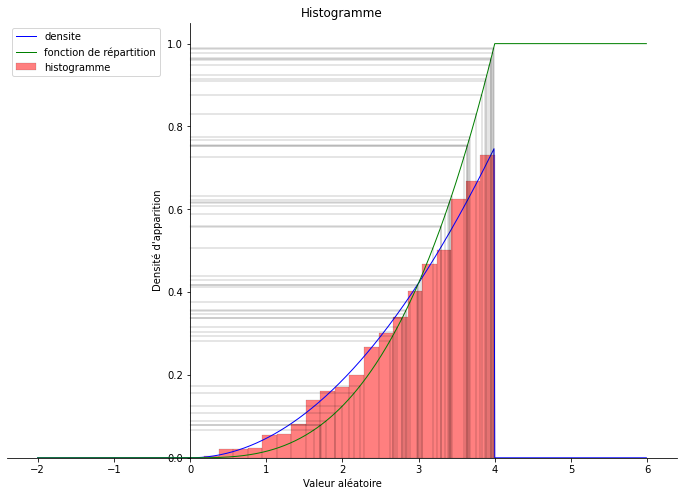

In [ ]:
def graphique_inversion(a):
    # illustration de l'inversion de la fonction de répartition
    # Une bille lancée au hasard, horizontalement entre 0 et 1 vient frapper la courbe de la fonction de répartiton
    # et tombe verticalement. L'histogramme obtenu après un grand nombre de lancers redessine la densité, d'où son nom...
    U = []
    for k in range(50):
        U = rd.random()
        x = inverse_repartition(U,a)
        plt.plot([0,x],[U,U],'k', linewidth = 0.2 , label = '', color = 'black')
        plt.plot([x,x],[U,0],'k', linewidth = 0.2 , label = '', color = 'black')

    #plt.legend()
    centrax()

a = 4

plt.figure(figsize = (12,8))

histogramme(echantillon)

densite_fonction2repartition(a)
graphique_inversion(a)
plt.show()

## 7. Si on augmente la taille N de l'échantillon ?

L'histogramme obtenu semble s'ajuster à la fonction de densité, et ce d'autant mieux que $N$ est grand.

## 8. et 9. Moyenne et Variance de l'échantillon (statistique) et comparaison avec les valeurs théoriques (probabilités).

In [ ]:
esperance = 3*a/4 # Calculée au 2°)
var = 3*a**2/80
ecart_type = sqrt(var)


#print(echantillon)
print("Moyenne de l'échantillon :",np.mean(echantillon))
print('Espérance théorique :',esperance)

print("Variance de l'échantillon :",np.var(echantillon))
print("Variance théorique : ", var)

Moyenne de l'échantillon : 3.0176356864002445
Espérance théorique : 3.0
Variance de l'échantillon : 0.6001497175332994
Variance théorique :  0.6
